In [2]:
import fileHandle


filePath = "EMG_data_for_gestures-master/*/*.txt"
# filePath = "EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt"
data, fileList = fileHandle.readFiles(filePath)

print(fileList[0])
print(data[0][:,0])

EMG_data_for_gestures-master/08/1_raw_data_12-14_23.03.16.txt
[1.0000e+00 4.0000e+00 5.0000e+00 ... 6.2922e+04 6.2923e+04 6.2924e+04]


In [1]:
import cusignal
import cupy as cp
from cupy.fft import fft, fftshift
import matplotlib.pyplot as plt

Text(0.5, 0, 'Sample')

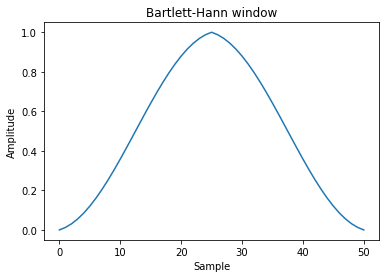

In [2]:
window = cusignal.barthann(51)
plt.plot(cp.asnumpy(window))
plt.title("Bartlett-Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

Text(0.5, 0, 'Normalized frequency [cycles per sample]')

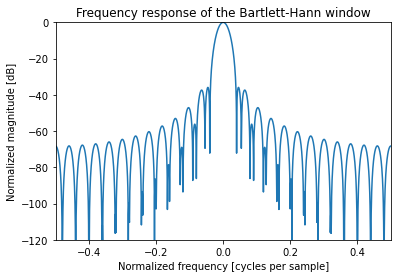

In [3]:
plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = cp.linspace(-0.5, 0.5, len(A))
response = 20 * cp.log10(cp.abs(fftshift(A / cp.abs(A).max())))


plt.plot(cp.asnumpy(freq), cp.asnumpy(response))
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Bartlett-Hann window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

In [4]:
fs = 10e3
N = 1e5
amp = 20
freq = 1234.0
noise_power = 0.001 * fs / 2
time = cp.arange(N) / fs
b, a = cusignal.buffer(2, 0.25, 'low')
x = cp.random.normal(scale=cp.sqrt(noise_power), size=time.shape)
# lfilter not implemented in cuSignal
y = cusignal.lfilter(b, a, x)
x += amp*cp.sin(2*cp.pi*freq*time)
y += cp.random.normal(scale=0.1*cp.sqrt(noise_power), size=time.shape)

AttributeError: module 'cusignal' has no attribute 'butter'